In [5]:
 pip install tensorflow


  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.73.1-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached h5py-3.14.0-cp311-cp311-win_amd64.whl.metadata (2.7 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-win_amd64.whl.metadata (22 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl.metada

In [8]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 46s 0us/step


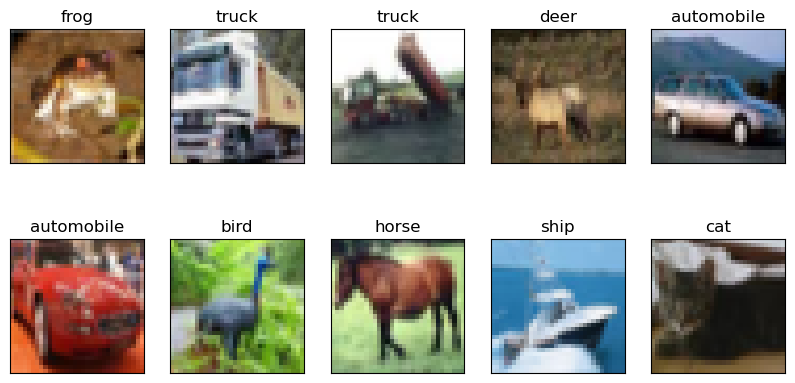

In [9]:
# Step 3: Visualize Some Sample Images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
plt.show()

In [27]:
# Step 4: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


In [25]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# Step 6: Train the Model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 35ms/step - accuracy: 0.3479 - loss: 1.7471 - val_accuracy: 0.5643 - val_loss: 1.2169
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 18ms/step - accuracy: 0.5775 - loss: 1.1990 - val_accuracy: 0.6087 - val_loss: 1.1286
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.6400 - loss: 1.0252 - val_accuracy: 0.6273 - val_loss: 1.0498
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 25ms/step - accuracy: 0.6789 - loss: 0.9093 - val_accuracy: 0.6843 - val_loss: 0.9084
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.7061 - loss: 0.8342 - val_accuracy: 0.6745 - val_loss: 0.9212
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 24ms/step - accuracy: 0.7366 - loss: 0.7580 - val_accuracy: 0.6943 - val_loss: 0.8946
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.7518 - loss: 0.7089 - val_accuracy: 0.7006 - val_loss: 0.8646
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7636 -

In [26]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.2f}")


313/313 - 5s - 15ms/step - accuracy: 0.1004 - loss: 2.3072

✅ Test Accuracy: 0.10


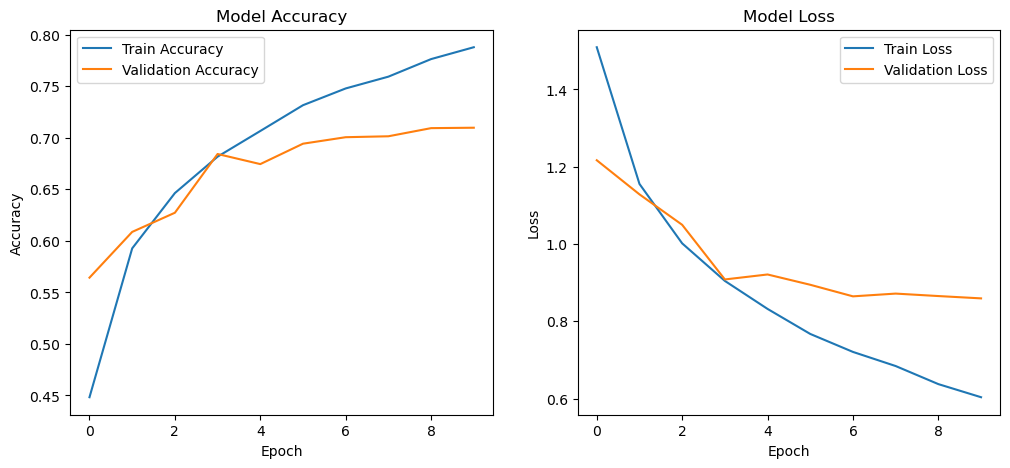

In [18]:
# Step 8: Visualize Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()